# Projeto facerecog

In [2]:
%%writefile requirements.txt

# lista extensa do environment, depois filtro para os que foram utilizados realmente
alabaster==0.7.9
Babel==2.3.4
cycler==0.10.0
Cython==0.24.1
dask==0.11.0
decorator==4.0.10
docutils==0.12
entrypoints==0.2.2
h5py==2.6.0
imagesize==0.7.1
ipykernel==4.5.0
ipyparallel==5.2.0
ipython==5.1.0
ipython-genutils==0.1.0
ipywidgets==5.2.2
Jinja2==2.8
jsonschema==2.5.1
jupyter-client==4.4.0
jupyter-core==4.2.0
MarkupSafe==0.23
matplotlib==1.5.3
mistune==0.7.3
nbconvert==4.2.0
nbformat==4.1.0
networkx==1.11
nose==1.3.7
notebook==4.2.2
numexpr==2.6.1
numpy==1.11.1
pandas==0.18.1
pexpect==4.2.1
pickleshare==0.7.4
Pillow==3.3.1
prompt-toolkit==1.0.7
ptyprocess==0.5.1
Pygments==2.1.3
pyparsing==2.1.9
pytesseract==0.1.6
python-dateutil==2.5.3
pytz==2016.6.1
pyzmq==15.4.0
qtconsole==4.2.1
readline==6.2.4.1
requests==2.11.1
scikit-image==0.12.3
scipy==0.18.0
seaborn==0.7.1
simplegeneric==0.8.1
six==1.10.0
snowballstemmer==1.2.1
Sphinx==1.4.6
tables==3.3.0
terminado==0.6
testpath==0.3
toolz==0.8.0
tornado==4.4.1
traitlets==4.3.0
wcwidth==0.1.7
widgetsnbextension==1.2.6

# the following must be installed separately
# opencv==3.1.0
# tesseract

Writing requirements.txt


In [ ]:
# uncomment line below to install requirements (recommended to use a virtualenv)
#!pip install -r requirements.txt

In [1]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pytesseract

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

""" image trasformation packages """
from PIL import Image
import skimage.io as skio
from skimage.util import dtype_limits
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters import rank

""" statistical data visualization packages"""
import seaborn as sns

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
img_files = sorted(glob('../imagens/*.png'))

imgs = skio.imread_collection(img_files)

def plot_captchas(imgs, grid=(5, 4)):
    gs = gridspec.GridSpec(*grid)
    for idx, gspec in enumerate(gs):
        ax = plt.subplot(gspec)
        plt.imshow(imgs[idx])

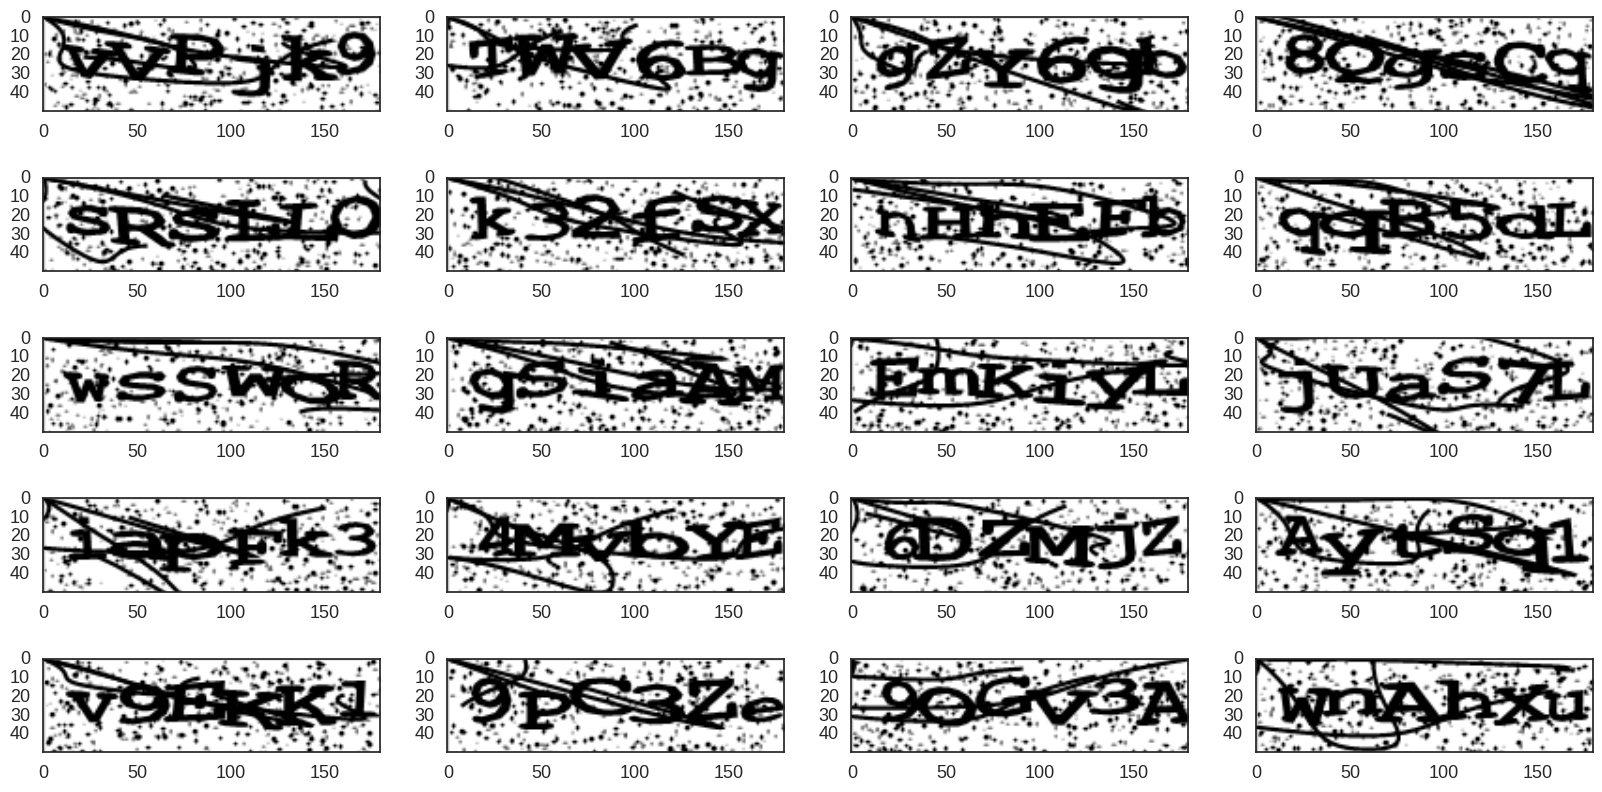

In [3]:
plot_captchas(imgs)

In [4]:
def remove_small_blobs(bw_img, min_area=10, **label_kwargs):
    """ Remove small blobs in the bw img. """
    labels = label(bw_img, **label_kwargs)

    # pick the background and foreground colors
    bg = label_kwargs.get('background', 0) 
    fg = dtype_limits(bw_img, clip_negative=True)[1] - bg

    # create an empty image
    new_bw = np.ones_like(bw_img) * bg
    
    # check the area of each region
    for roi in regionprops(labels):
        if roi.area >= min_area:
            new_bw[labels == roi.label] = fg

    return new_bw

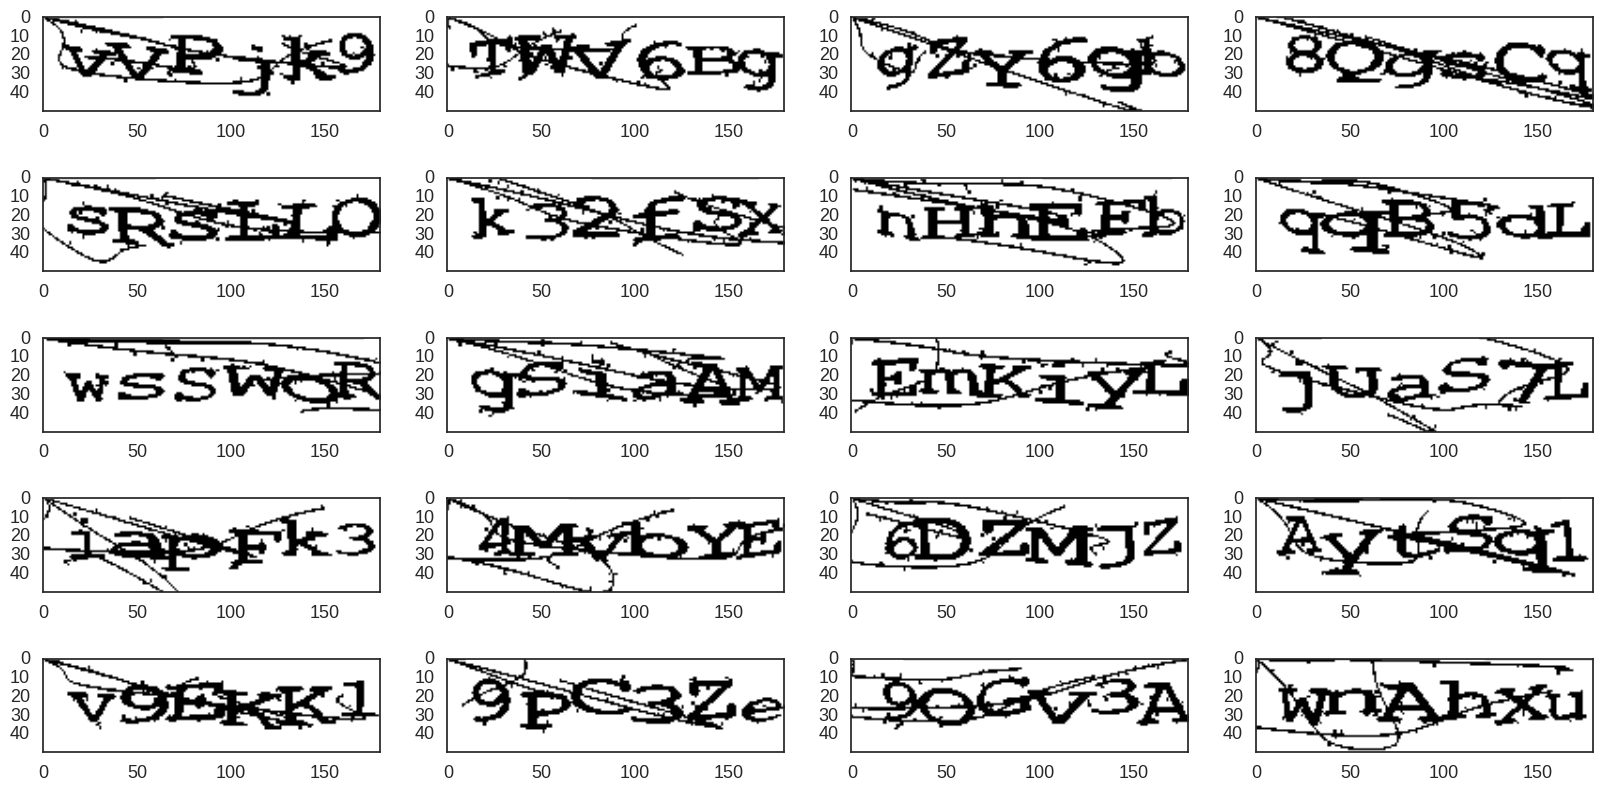

In [5]:
unblobbed = [remove_small_blobs(img, min_area=50, background=255) for img in imgs]
plot_captchas(unblobbed, (5, 4))

In [40]:
for img in unblobbed:
    img = Image.fromarray( img )
    print( pytesseract.image_to_string( img ) )









WSS





M32







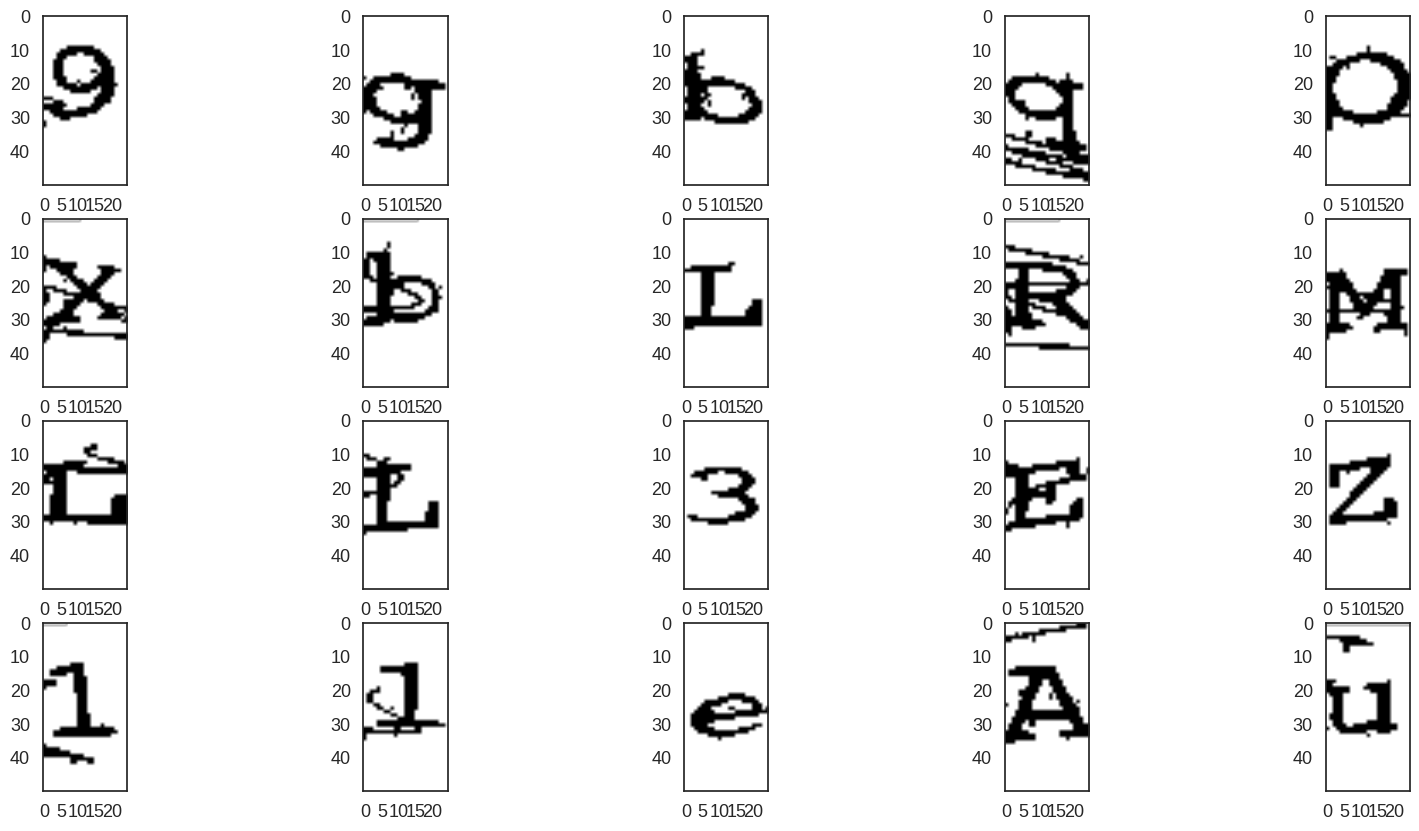

In [24]:
# 6º caractere
x1 = 0
x2 = 50
y1 = 155
y2 = 190
cropped = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped, (4, 5) )

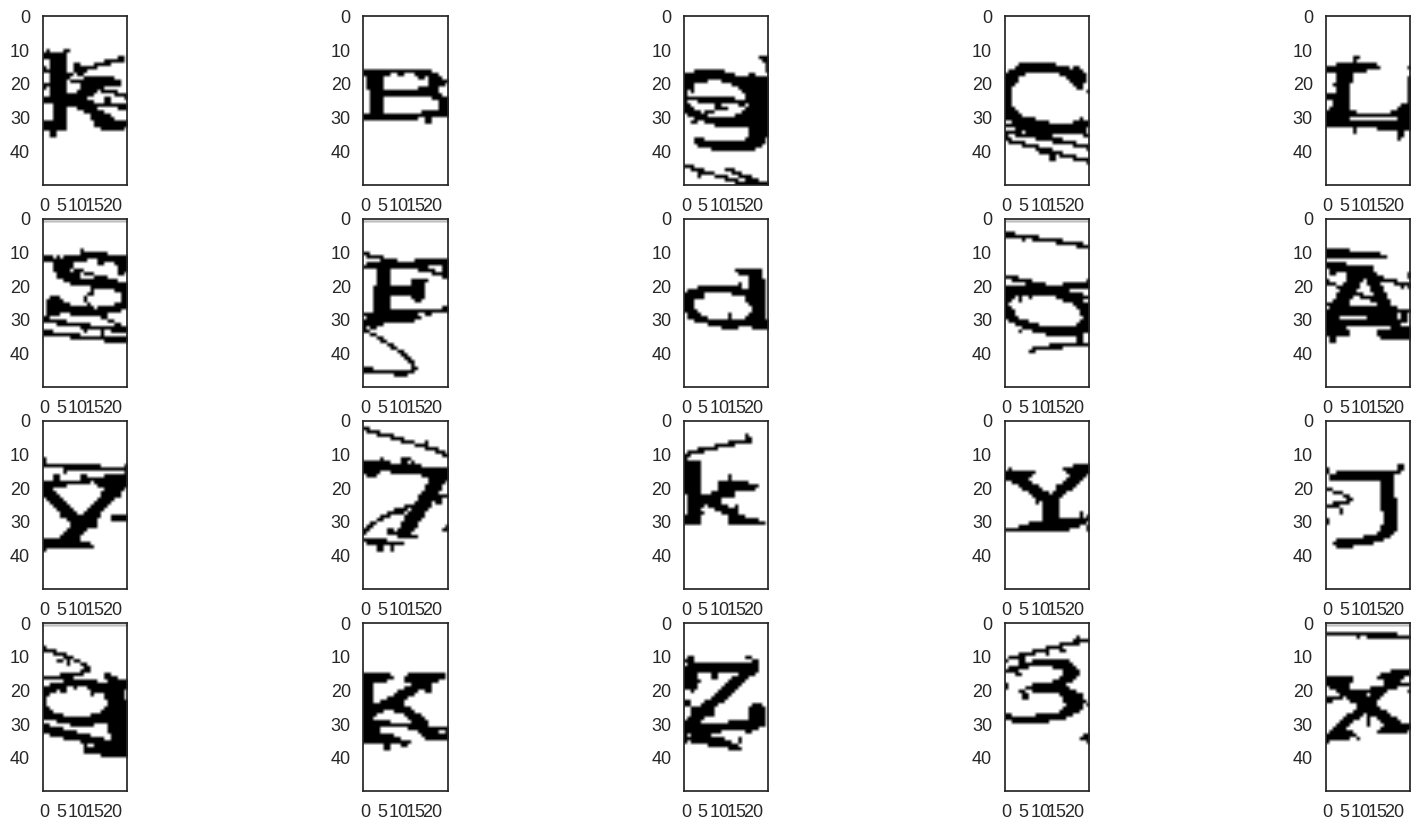

In [25]:
# 5º caractere
x1 = 0
x2 = 50
y1 = 130
y2 = 155
cropped = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped, (4, 5) )

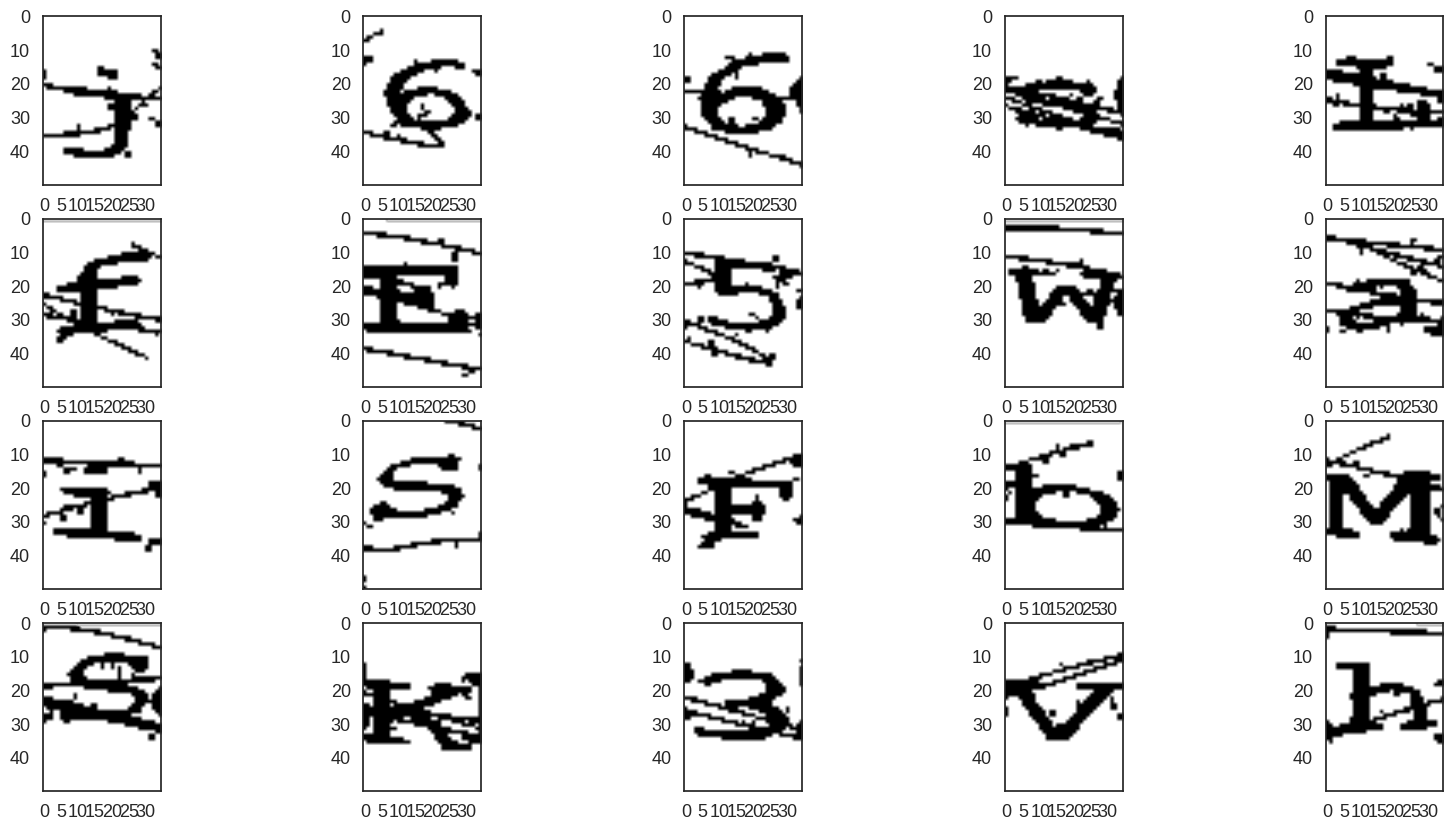

In [26]:
# 4º caractere
x1 = 0
x2 = 50
y1 = 95
y2 = 130
cropped = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped, (4, 5) )

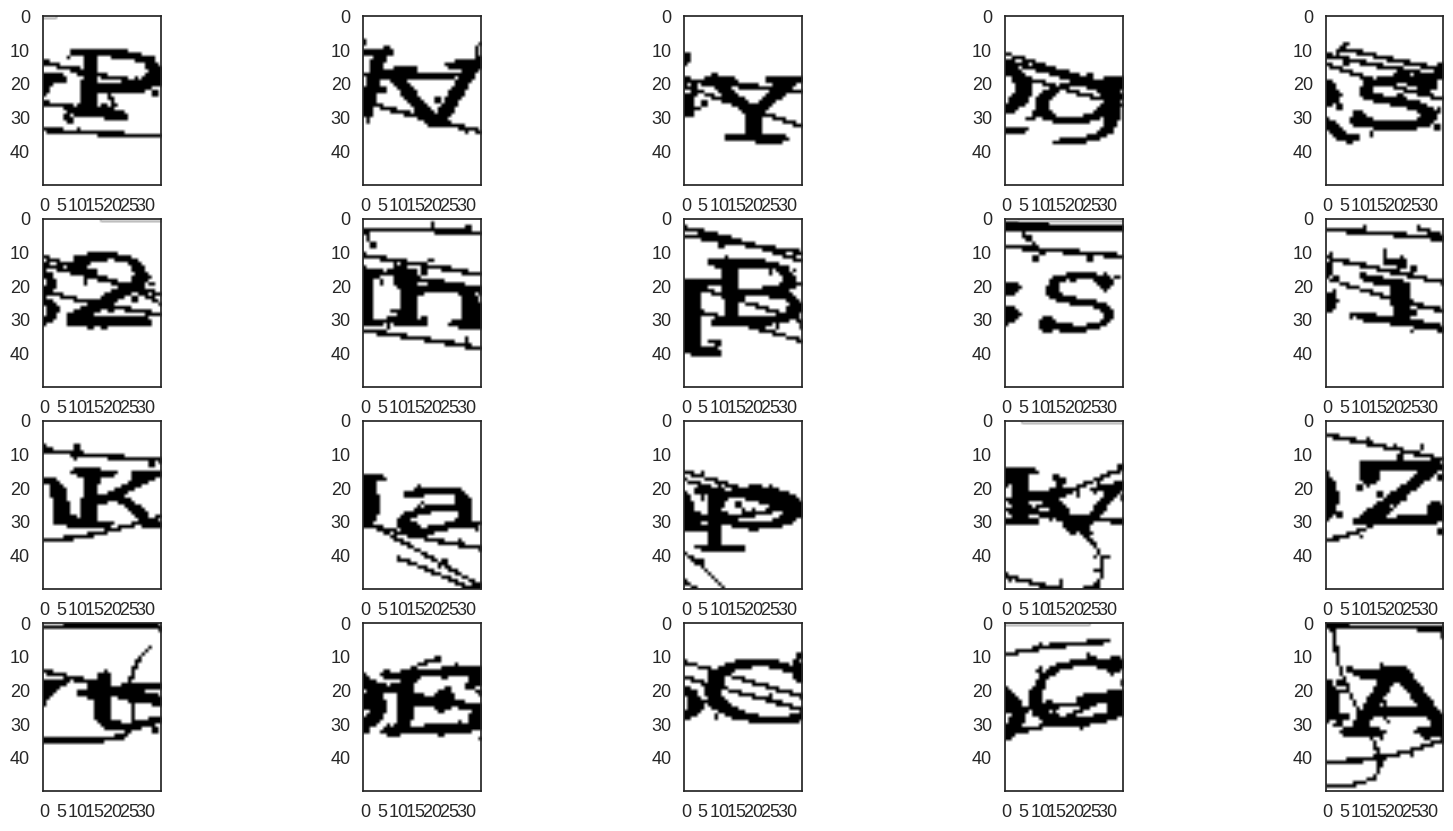

In [30]:
# 3º caractere
x1 = 0
x2 = 50
y1 = 60
y2 = 95
cropped = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped, (4, 5) )

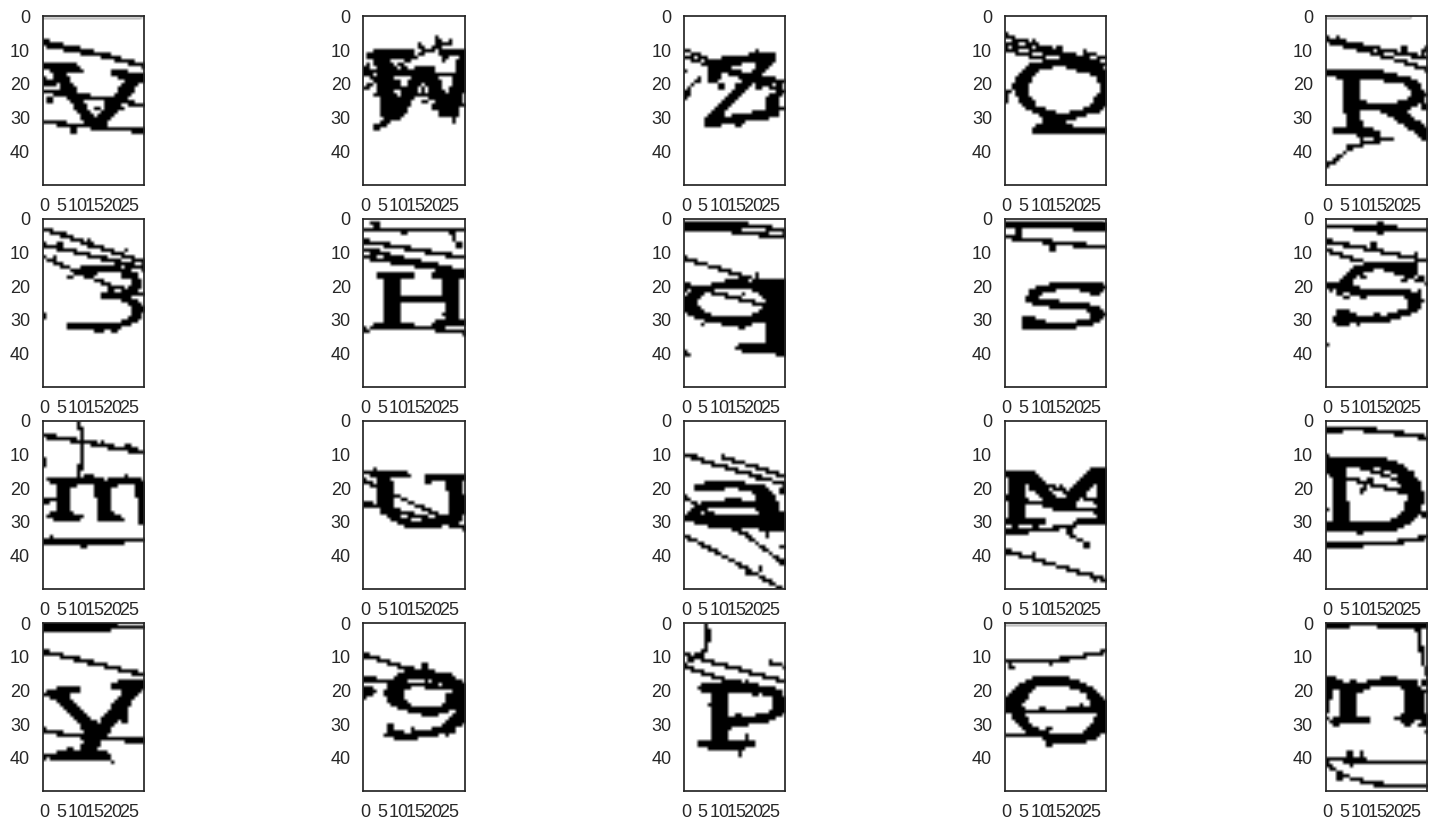

In [33]:
# 2º caractere
x1 = 0
x2 = 50
y1 = 35
y2 = 65
cropped = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped, (4, 5) )

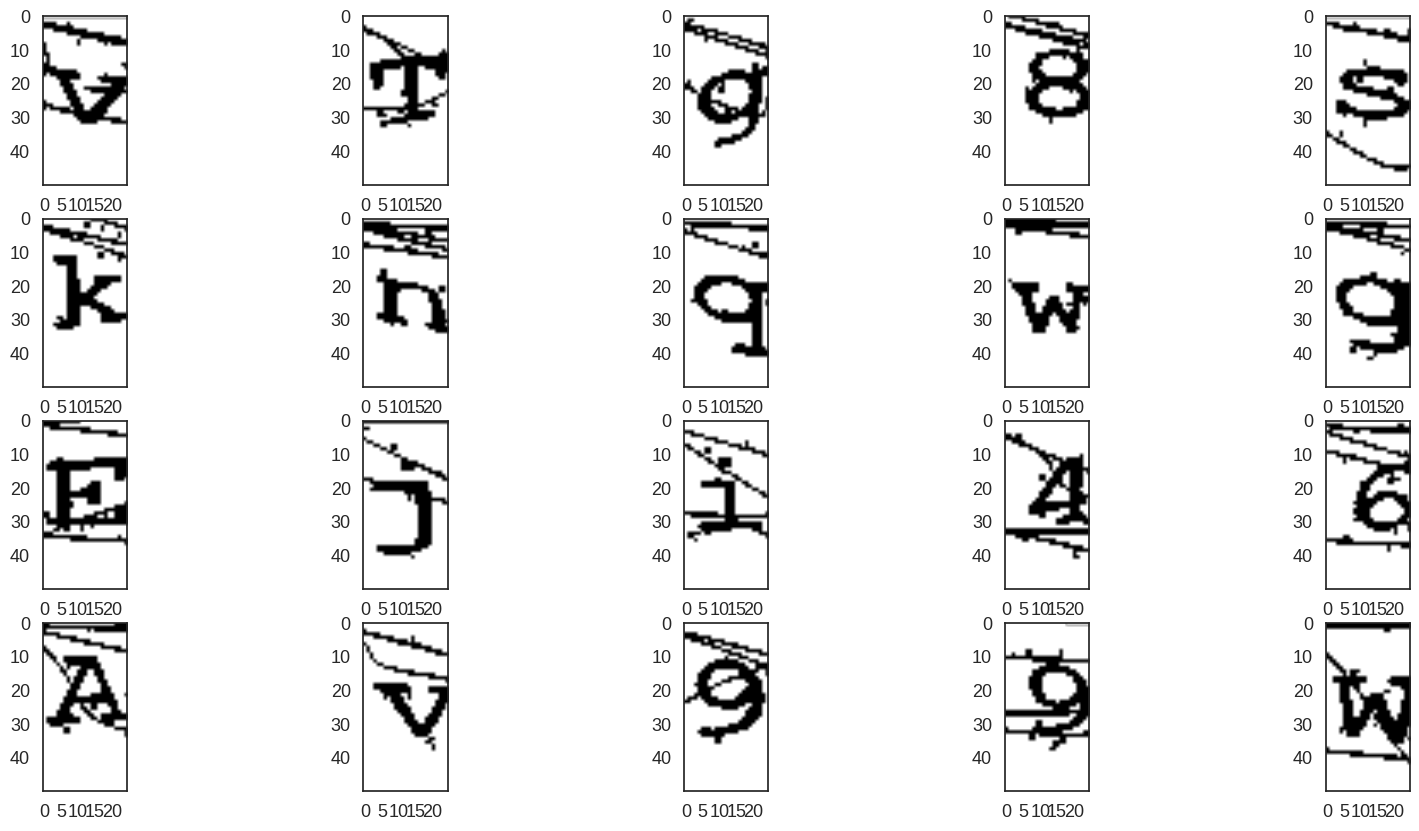

In [36]:
# 1º caractere
x1 = 0
x2 = 50
y1 = 10
y2 = 35
cropped = [img[x1:x2, y1:y2] for img in unblobbed ]
plot_captchas( cropped, (4, 5) )